## Import Libraries and Load Data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# list of named time zones
import pytz
#all_tzs = pytz.all_timezones
#len(all_tzs)

# import the statsmodels time series analysis api module
# seasonal decompose
import statsmodels.tsa.api as tsa

# get peaks (max point) of each season
from scipy.signal import find_peaks

import datetime as dt

import glob


import warnings
warnings.filterwarnings('ignore')

In [2]:
q = 'Data/Chicago/Chicago-Crime_*.csv'
chunked_files = glob.glob(q)
# Showing the first 5
chunked_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [3]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in chunked_files])
df_combined

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218
5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,41.915450,-87.726575
1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
...,...,...,...,...,...,...,...,...,...,...,...
13155968,07/28/2023 12:42:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,633,6.0,8.0,NaN,NaN
13157182,07/28/2023 12:45:00 PM,THEFT,$500 AND UNDER,STREET,False,False,833,8.0,23.0,NaN,NaN
13156399,07/28/2023 12:48:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,GAS STATION,True,False,323,3.0,6.0,NaN,NaN


In [4]:
df = df_combined.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7857709 entries, 1333483 to 13162253
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.5+ MB


In [5]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

## Clean Data

In [6]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218
5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,41.915450,-87.726575
1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214


## Convert Data column to datetime

In [7]:
fmt = '%m/%d/%Y %I:%M:%S %p'

In [8]:
df['Datetime'] = pd.to_datetime(df['Date'], format=fmt)

In [9]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
ID,,,,,,,,,,,,
1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218,2001-01-01 13:00:00
5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849,2001-01-01 01:00:00
1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856,2001-01-01 01:00:00
1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,41.915450,-87.726575,2001-01-01 01:00:00
1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214,2001-01-01 01:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7857709 entries, 1333483 to 13162253
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
 11  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 674.4+ MB


## Set Datetime as index

In [11]:
df = df.set_index('Datetime')
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01 13:00:00,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849


## Drop unneccassary columns

In [12]:
df.drop(columns=['Latitude', 'Longitude', 'Date'], inplace=True)
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
Datetime,,,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0


In [13]:
df['Primary Type'].value_counts().index.sort_values()

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object')

# Tasks

## Topic 1: Comparing Police Districts

- **Which district has the most crimes?**

- **Which district has the least number of crimes?**

In [14]:
print(df['Primary Type'].unique())
len(df['Primary Type'].unique())

['CRIMINAL DAMAGE' 'OFFENSE INVOLVING CHILDREN' 'THEFT' 'BATTERY'
 'SEX OFFENSE' 'ASSAULT' 'OTHER OFFENSE' 'NARCOTICS' 'MOTOR VEHICLE THEFT'
 'PUBLIC PEACE VIOLATION' 'DECEPTIVE PRACTICE' 'BURGLARY' 'GAMBLING'
 'CRIM SEXUAL ASSAULT' 'WEAPONS VIOLATION' 'LIQUOR LAW VIOLATION'
 'ROBBERY' 'CRIMINAL TRESPASS' 'INTERFERENCE WITH PUBLIC OFFICER'
 'HOMICIDE' 'KIDNAPPING' 'PROSTITUTION' 'STALKING' 'INTIMIDATION'
 'CRIMINAL SEXUAL ASSAULT' 'ARSON' 'RITUALISM' 'DOMESTIC VIOLENCE'
 'OBSCENITY' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON-CRIMINAL' 'HUMAN TRAFFICKING'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON - CRIMINAL']


36

### Remove Non Criminal Primary Types

In [15]:
non_crime = df['Primary Type'].str.startswith('NON')

In [16]:
df1 = df[~non_crime]
df1

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
Datetime,,,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0
2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN
2001-01-01 01:00:00,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN
2001-01-01 01:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN
...,...,...,...,...,...,...,...,...
2023-07-28 00:42:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,633,6.0,8.0
2023-07-28 12:45:00,THEFT,$500 AND UNDER,STREET,False,False,833,8.0,23.0
2023-07-28 12:48:00,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,GAS STATION,True,False,323,3.0,6.0


### Counts for each District

In [17]:
dcounts = df1['District'].value_counts().sort_values()
dcounts

21.0         4
31.0       236
20.0    139125
17.0    226751
24.0    237633
22.0    257433
16.0    263175
14.0    303835
1.0     318458
15.0    336146
10.0    338583
5.0     347900
18.0    352835
19.0    353243
2.0     372352
9.0     383646
12.0    389895
3.0     398489
4.0     446198
25.0    446739
7.0     453520
6.0     459575
11.0    503907
8.0     527754
Name: District, dtype: int64

In [18]:
dcounts.values.sum()

7857432

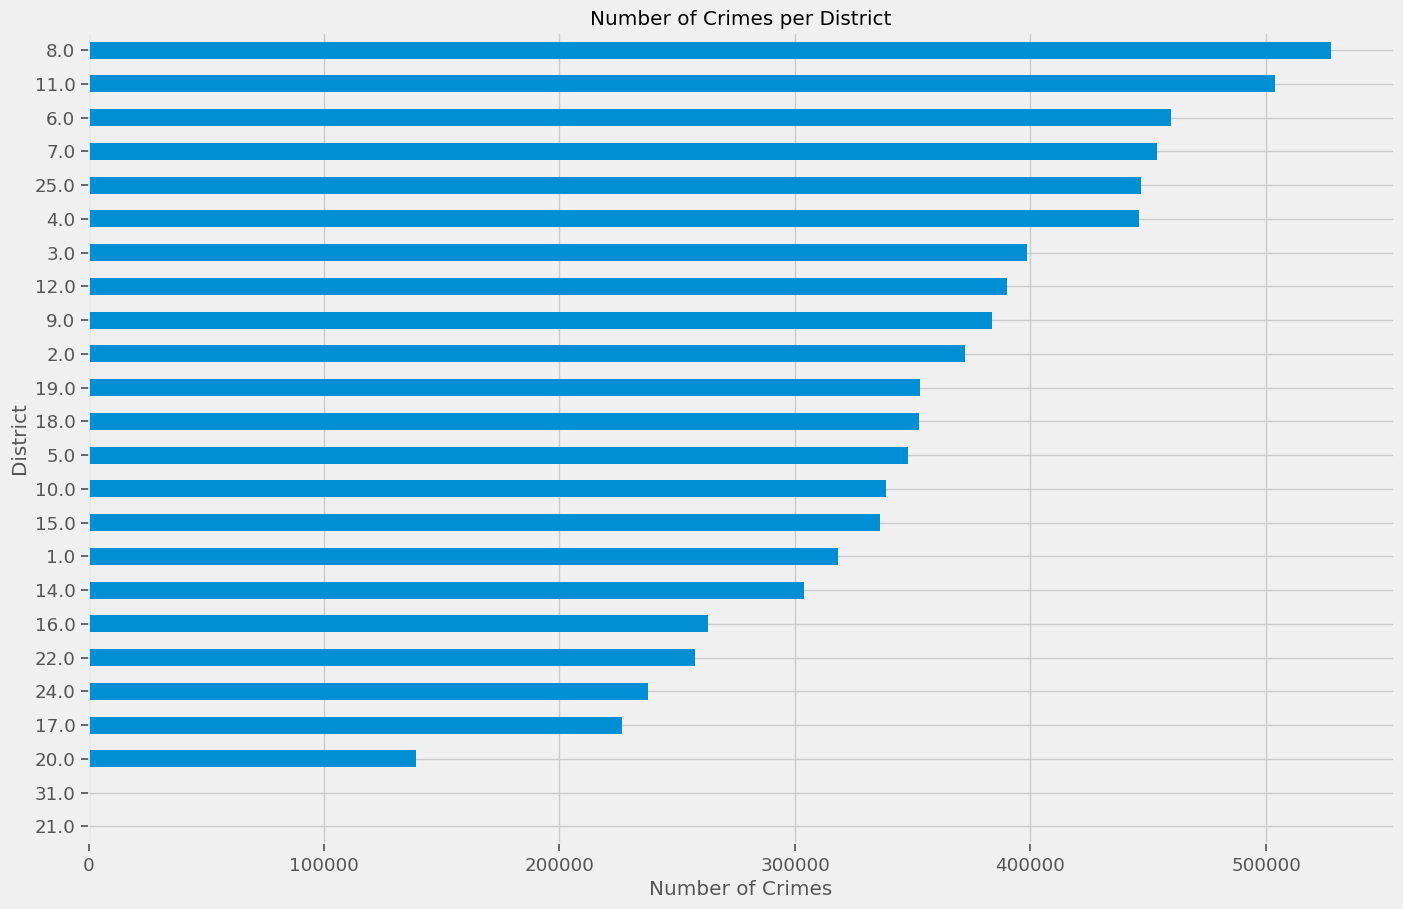

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
dcounts.plot(kind='barh')

plt.xlabel('Number of Crimes')
plt.ylabel('District')
plt.title('Number of Crimes per District');

### District with most crimes.

- **District 8 with 527600.**

### District with least crimes.

- **District 21 with 4.**

## Topic 2: Crimes Across Years
- **Is the total number of crimes increasing or decreasing across the years?**


- **Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?**

### Crimes increasing or decreasing over years?

In [20]:
df2 = df[~non_crime]

In [21]:
df2['Year'] = df2.index.year

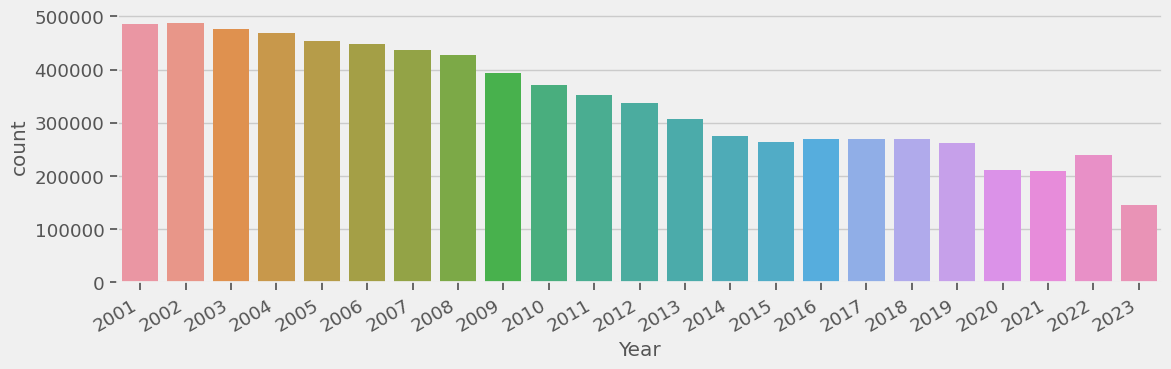

In [22]:
## Visualize years
ax = sns.countplot(data=df2, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [23]:
df2['Year'].value_counts().sort_index(ascending = False)

2023    145092
2022    238740
2021    208763
2020    212179
2019    261292
2018    268780
2017    269060
2016    269761
2015    264743
2014    275721
2013    307472
2012    336268
2011    351976
2010    370505
2009    392825
2008    427169
2007    437087
2006    448179
2005    453772
2004    469421
2003    475983
2002    486806
2001    485885
Name: Year, dtype: int64

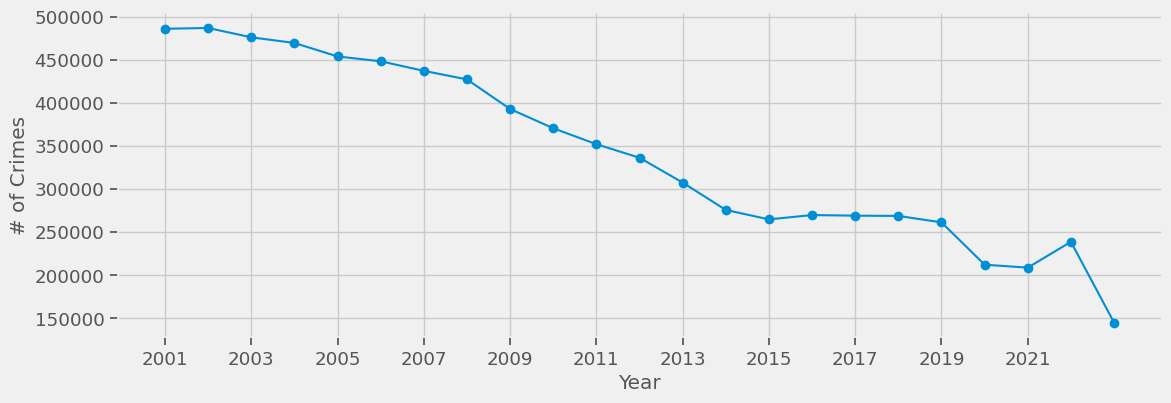

In [24]:
## save year counts
year_counts = df2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

plt.xticks(np.arange(2001, 2023, step=2));

### Overall Trend?
- **Over the years of 2001 to 2023 the overall trend for crime is decreasing.**

### Individual Crimes against trend?

In [25]:
df2

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year
Datetime,,,,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,2001
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001
2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,2001
2001-01-01 01:00:00,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,2001
2001-01-01 01:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,2001
...,...,...,...,...,...,...,...,...,...
2023-07-28 00:42:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,633,6.0,8.0,2023
2023-07-28 12:45:00,THEFT,$500 AND UNDER,STREET,False,False,833,8.0,23.0,2023
2023-07-28 12:48:00,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,GAS STATION,True,False,323,3.0,6.0,2023


In [26]:
icrimes = df2.groupby('Primary Type').resample('M').size()

In [27]:
icrimes = icrimes.unstack().T
icrimes

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,NaN,162.0,3966.0,3.0,1192.0,1398.0,1.0,44.0,42.0,NaN,36.0,18.0,75.0,101.0,2097.0,4714.0,2.0,246.0,1.0,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,NaN,134.0,3665.0,1.0,1063.0,1163.0,NaN,37.0,27.0,NaN,27.0,24.0,57.0,109.0,1785.0,4369.0,1.0,152.0,0.0,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,149.0,4617.0,4.0,1141.0,1313.0,NaN,55.0,37.0,NaN,22.0,22.0,72.0,147.0,2151.0,4862.0,2.0,195.0,0.0,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7766.0,345.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,132.0,4922.0,2.0,1133.0,1199.0,NaN,79.0,59.0,NaN,34.0,21.0,49.0,164.0,2120.0,4044.0,2.0,196.0,0.0,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8887.0,1997.0,1.0,155.0,4757.0,2.0,1067.0,1261.0,NaN,94.0,42.0,NaN,41.0,25.0,56.0,194.0,2197.0,4038.0,1.0,213.0,2.0,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,29.0,1755.0,3404.0,570.0,17.0,NaN,2320.0,111.0,440.0,1480.0,NaN,1.0,37.0,2.0,61.0,30.0,6.0,24.0,2320.0,398.0,4.0,151.0,NaN,1394.0,7.0,0.0,66.0,NaN,685.0,102.0,38.0,4446.0,631.0
2023-04-30,36.0,1807.0,3600.0,594.0,12.0,NaN,2430.0,121.0,363.0,1400.0,NaN,0.0,55.0,0.0,51.0,20.0,5.0,10.0,2284.0,322.0,2.0,162.0,NaN,1222.0,5.0,0.0,82.0,NaN,752.0,112.0,38.0,4333.0,688.0
2023-05-31,54.0,2013.0,3948.0,612.0,9.0,NaN,2580.0,148.0,389.0,1285.0,NaN,0.0,64.0,0.0,45.0,22.0,22.0,19.0,2426.0,332.0,4.0,170.0,NaN,1223.0,5.0,2.0,81.0,NaN,771.0,127.0,40.0,4687.0,820.0


In [28]:
icrimes = icrimes.fillna(0.0)
icrimes.isna().sum().sum()

0

### Trends for Individual Crimes

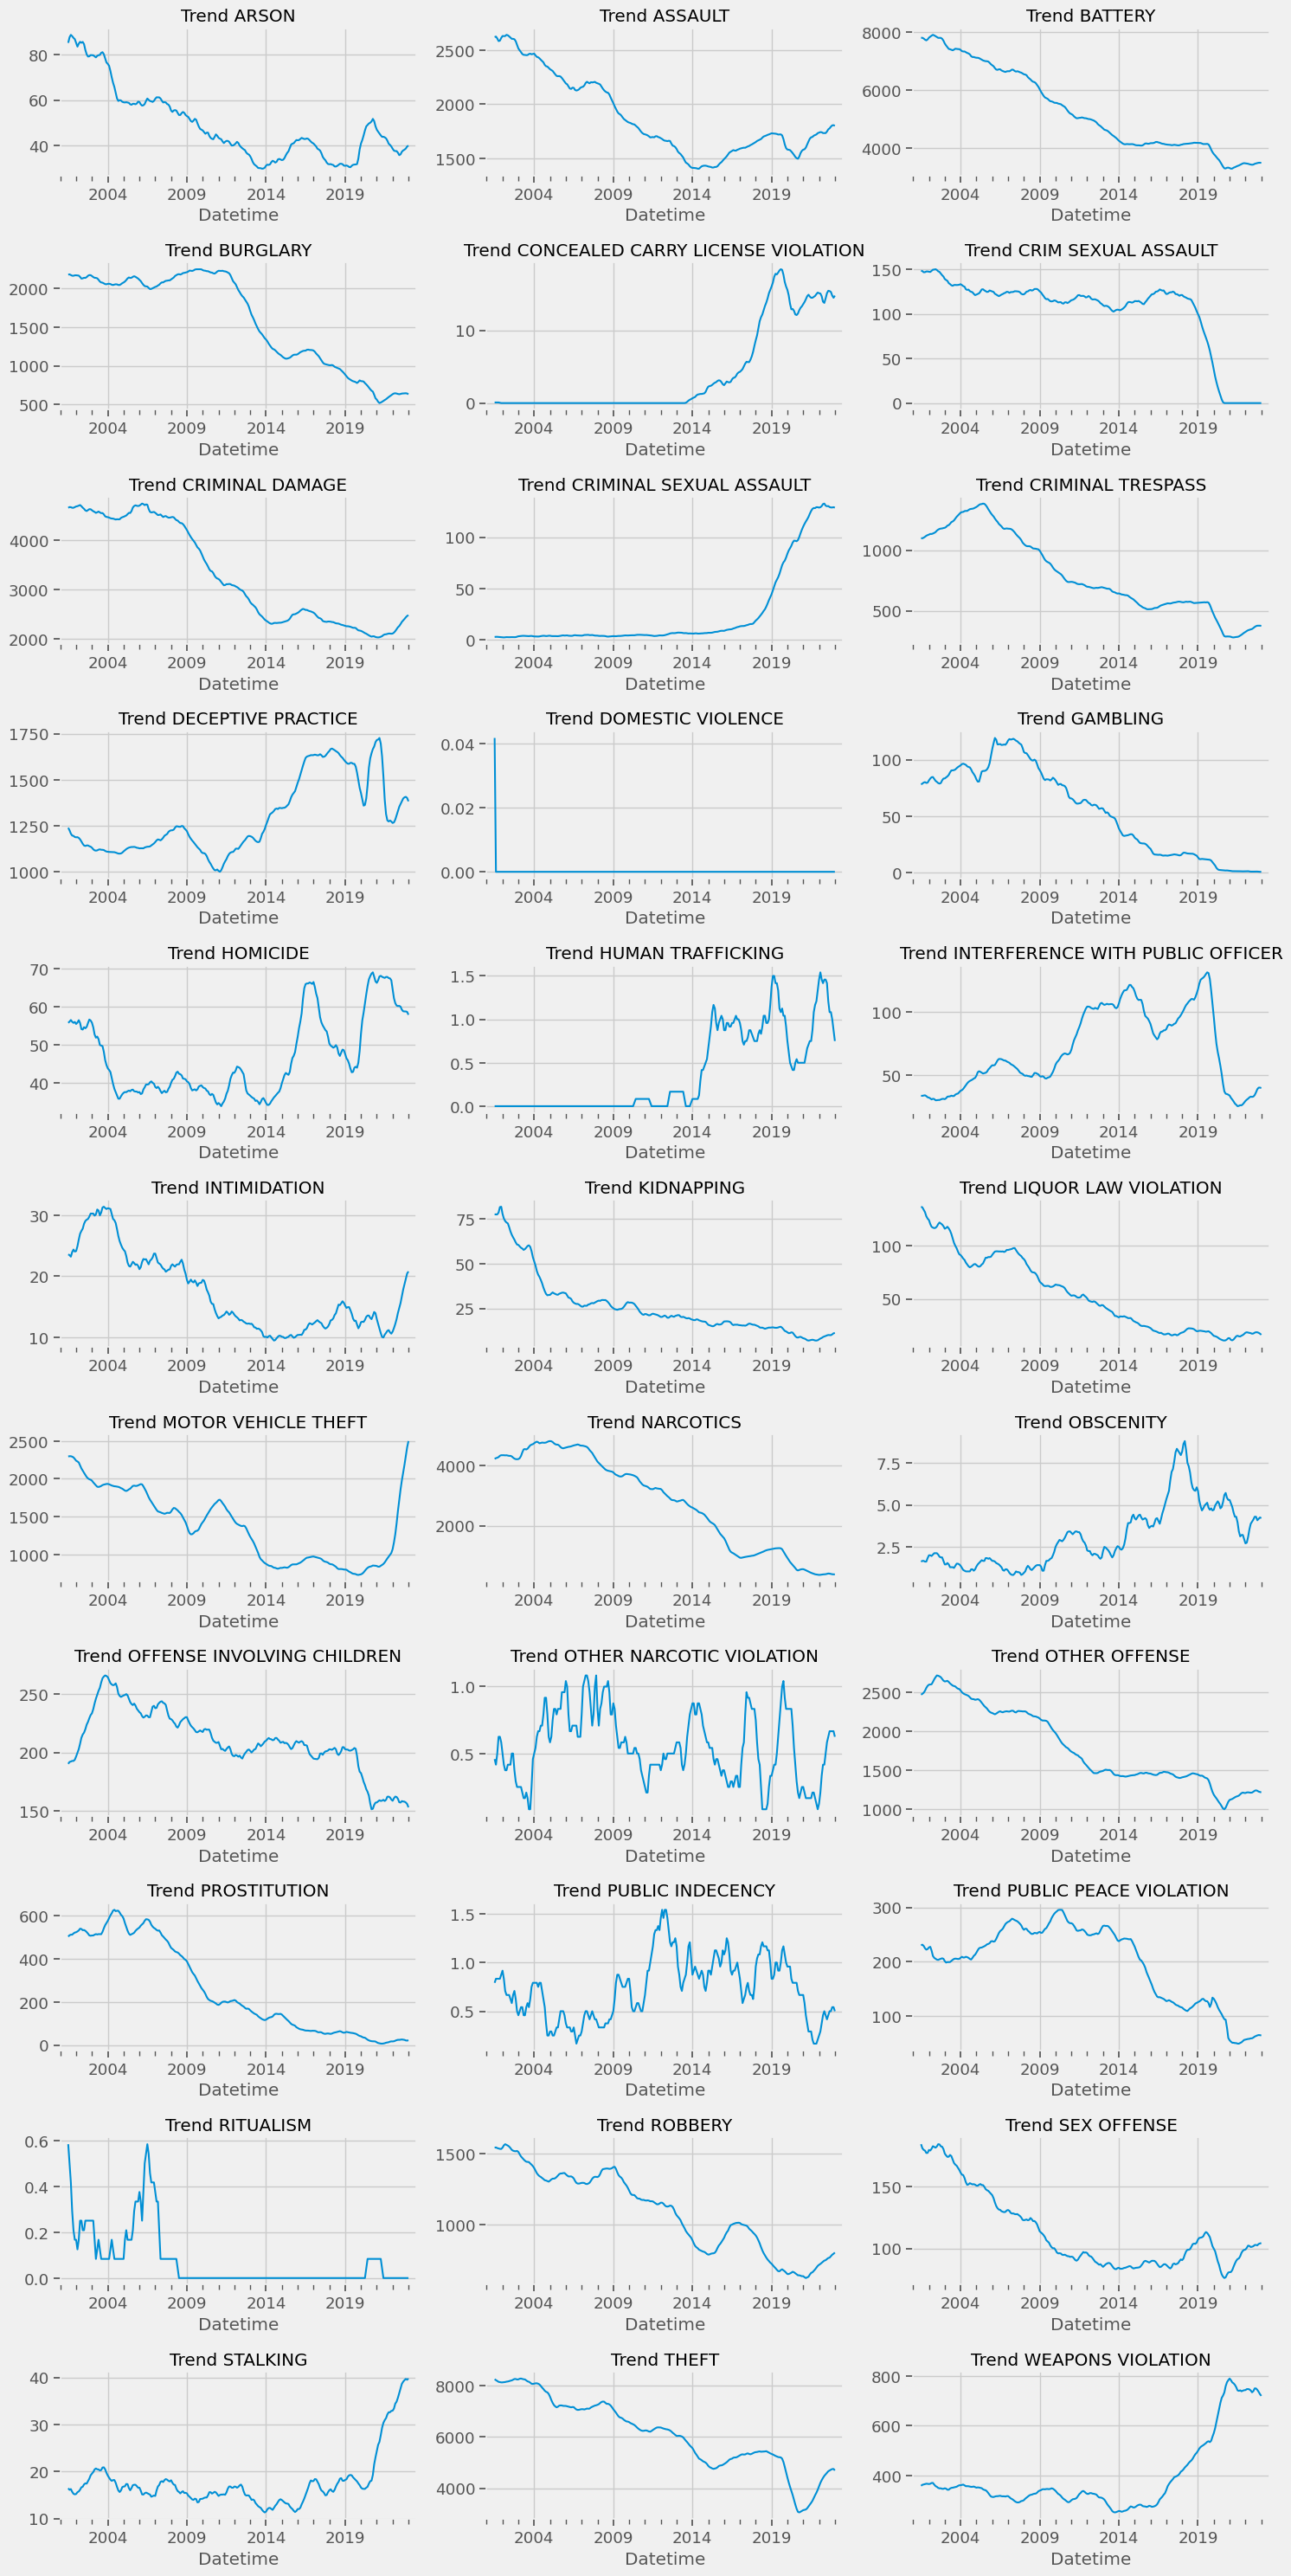

In [30]:
fig, axes = plt.subplots(11, 3, figsize=(15,30))

for indx, crime in enumerate(icrimes.columns):
    row = indx // 3
    col = indx % 3
    ts = icrimes[crime]
    decomp = tsa.seasonal_decompose(ts)
    
    decomp.trend.plot(title=f'{crime} Trend', ax = axes[row, col])
    axes[row, col].set_title(f'Trend {crime}')
plt.tight_layout();

- **Individual Crimes going against the yearly trend are:**
 - Concealed Carry License Violation
 - Criminal Sexual Assault
 - Deceptive Practice
 - Homicide
 - Human Trafficking
 - Motor Vehicle Theft
 - Stalking
 - Weapons Violations
    

## Topic 4 Comparing Months:
- **What months have the most crime? What months have the least?**


- **Are there any individual crimes that do not follow this pattern? If so, which crimes?**

In [31]:
df3 = df[~non_crime]

In [32]:
df3['Month'] = df3.index.month
df3['MonthName'] = df3.index.month_name()
df3.head(3)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Month,MonthName
Datetime,,,,,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,1,January
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,1,January
2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,1,January


In [33]:
#saving lookup for number vs name
unique_months = df3.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

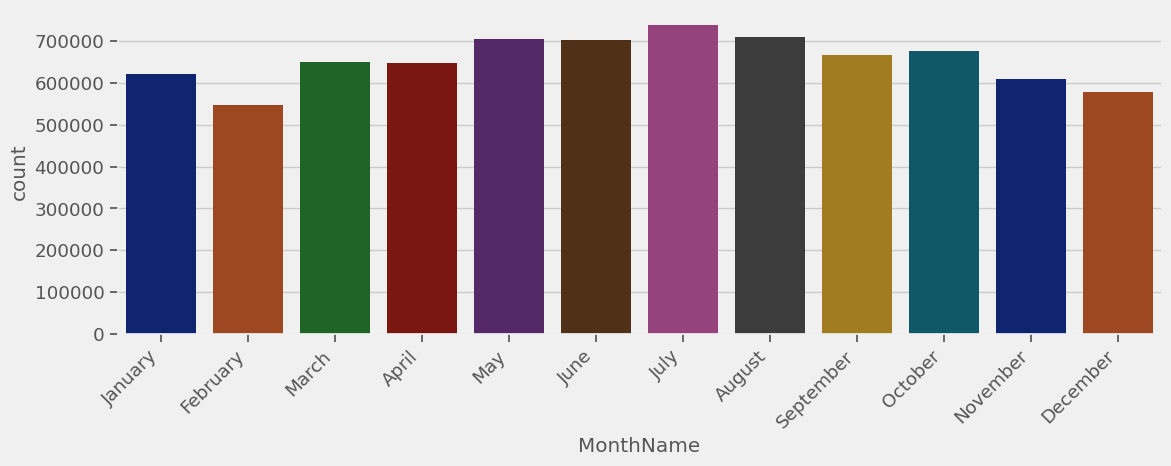

In [34]:
ax = sns.countplot(data=df3, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### Count of Crimes per Month

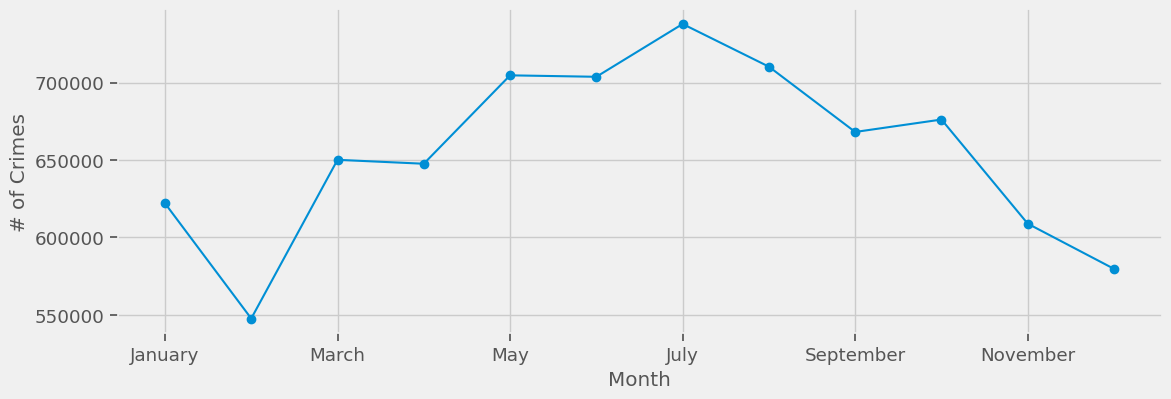

In [35]:
## save month counts
month_counts = df3['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

### Months with most crime:
- **May, June, July and August have the highest number of crimes. It appears that summertime is when criminal activity spikes**


- **November, December, January and February have the least number of crimes. It appears that less criminal activity occurs over the winter.**

### Crimes that go against the monthly trend?

In [36]:
df3

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Month,MonthName
Datetime,,,,,,,,,,
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,1,January
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,1,January
2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,1,January
2001-01-01 01:00:00,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,1,January
2001-01-01 01:00:00,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,1,January
...,...,...,...,...,...,...,...,...,...,...
2023-07-28 00:42:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,633,6.0,8.0,7,July
2023-07-28 12:45:00,THEFT,$500 AND UNDER,STREET,False,False,833,8.0,23.0,7,July
2023-07-28 12:48:00,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,GAS STATION,True,False,323,3.0,6.0,7,July


In [37]:
plot_type3 = df3.groupby('Primary Type')['Month', 'MonthName'].value_counts().sort_index()
plot_type3

Primary Type       Month  MonthName
ARSON              1      January       963
                   2      February      840
                   3      March        1140
                   4      April        1134
                   5      May          1284
                                       ... 
WEAPONS VIOLATION  8      August       9887
                   9      September    9435
                   10     October      9190
                   11     November     7952
                   12     December     7401
Length: 384, dtype: int64

In [38]:
plot_type3.index

MultiIndex([(            'ARSON',  1,   'January'),
            (            'ARSON',  2,  'February'),
            (            'ARSON',  3,     'March'),
            (            'ARSON',  4,     'April'),
            (            'ARSON',  5,       'May'),
            (            'ARSON',  6,      'June'),
            (            'ARSON',  7,      'July'),
            (            'ARSON',  8,    'August'),
            (            'ARSON',  9, 'September'),
            (            'ARSON', 10,   'October'),
            ...
            ('WEAPONS VIOLATION',  3,     'March'),
            ('WEAPONS VIOLATION',  4,     'April'),
            ('WEAPONS VIOLATION',  5,       'May'),
            ('WEAPONS VIOLATION',  6,      'June'),
            ('WEAPONS VIOLATION',  7,      'July'),
            ('WEAPONS VIOLATION',  8,    'August'),
            ('WEAPONS VIOLATION',  9, 'September'),
            ('WEAPONS VIOLATION', 10,   'October'),
            ('WEAPONS VIOLATION', 11,  'November

In [39]:
# create dataframe from plot_type3
plot_type3_df = plot_type3.to_frame('# of Crimes').reset_index()
plot_type3_df

,Primary Type,Month,MonthName,# of Crimes
0,ARSON,1,January,963
1,ARSON,2,February,840
2,ARSON,3,March,1140
3,ARSON,4,April,1134
4,ARSON,5,May,1284
...,...,...,...,...
379,WEAPONS VIOLATION,8,August,9887
380,WEAPONS VIOLATION,9,September,9435
381,WEAPONS VIOLATION,10,October,9190
382,WEAPONS VIOLATION,11,November,7952


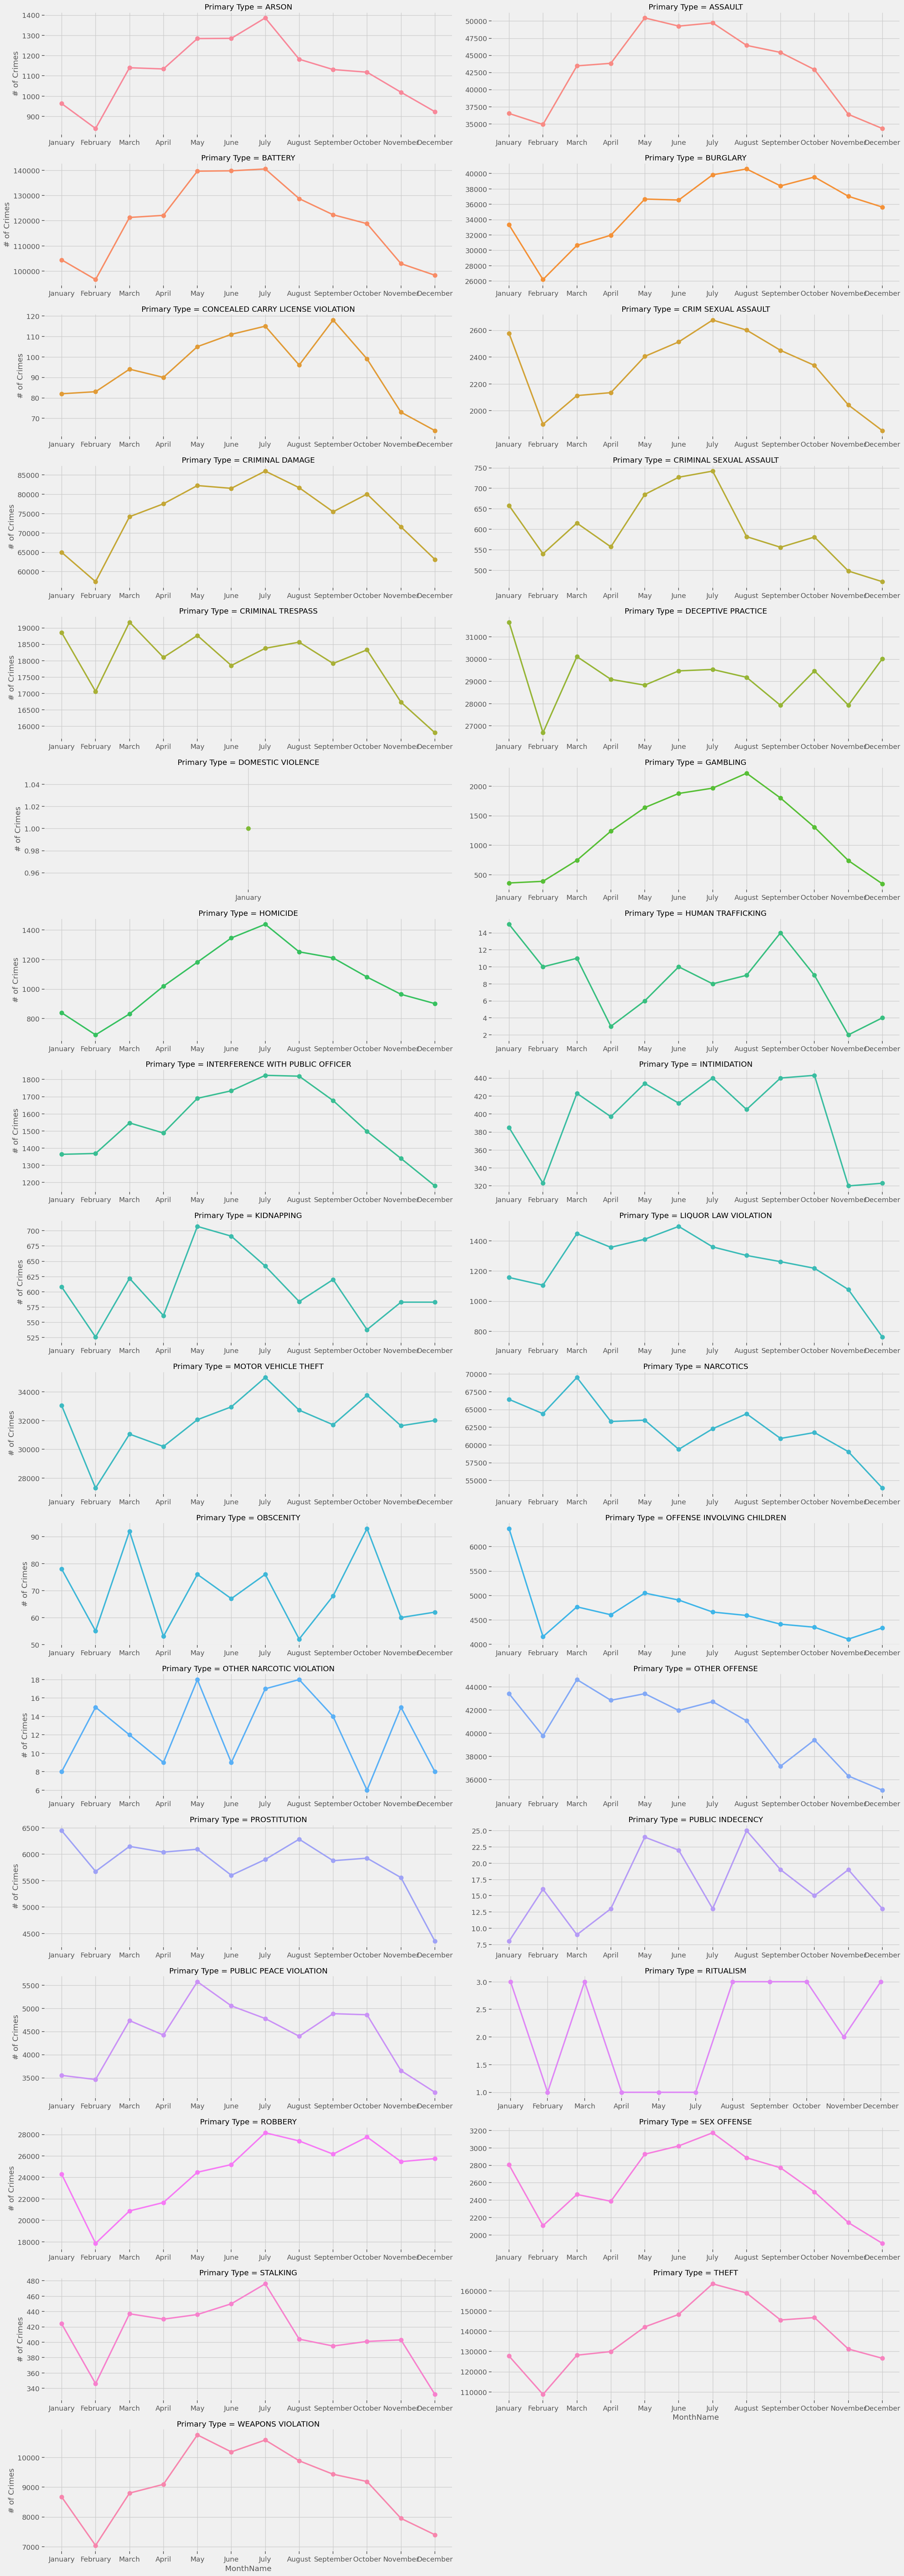

In [40]:
g = sns.catplot(data=plot_type3_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=3, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

### Crimes that don't follow monthly pattern

**Not all crimes follow the monthly pattern but the ones that break the pattern the most are:**
- criminal sexual assault
- deceptive practice
- offense involving children
- narcotics
- obscenity
- ritualism